# <font color='#3d59c6'> MD004 SESIÓN ENTROPÍA </font>

<font color='#3d59c6'>**OBJETIVO SESIÓN PRÁCTICA:**</font> se quiere realizar una <font color='#C90076'>**regresión logística que permita predecir qué jugadores de la NBA van a tener una carrera deportiva de 5 o más años a partir de ciertas variables.**</font> 

<img src="https://external-preview.redd.it/EtiCVwzZ6iwPr3XS2gZw5ofGpPqwFMVXzh-NaLUiU7s.jpg?auto=webp&s=8d09e11002c0280068fa9dd6572375a01f24c51f" alt="Descripción de la imagen" width="700">

<font color='#3d59c6'>**DATA**</font>: En este ejemplo utilizaremos el **dataset 202601S2_nba_logreg.csv** 

- **Name:** Nombre del jugador
- **GP:** Partidos jugados
- **MIN:** Minutos jugados
- **PTS:** Puntos por partido
- **FGM:** Tiros de campo
- **FGA:** Intentos de tiros de campo
- **FG%:** Acierto de puntos (%)
- **X3P Made:** Triples anotados
- **X3PA:** Intento de triples
- **X3P.:** Intento de triples (%)
- **FTM:** Tiros libres realizados
- **FTA:** Tiros libres intentados
- **FT%:** Tiros libres (%)
- **OREB:** Rebotes ofensivos
- **DREB:** Rebotes defensivos
- **REB:** Rebotes
- **AST:** Asistencias
- **STL:** Robatorios
- **BLK:** Bloqueos
- **TOV:** Cesión del balón
- **TARGET_5yrs:** Variable target

<font color='#3d59c6'>**PASOS:**</font> 

0. Carga de Packages
1. Carga de datos
2. Realizar análisis descriptivo:
    - principales estadísticos
    - graficación
3. Selección de variables:
    - 3.1 Realización IGA - Information Gain Algorithms Análisis Correlaciones
    - 3.2 Análisis Correlaciones
    - 3.3 Análisis PCA
    - 3.4 Análisis ANOVA
4. Modelo de regresión Logística
5. Conclusión


## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **FSelectorRcpp:** implementación 'Rcpp' (Weka) de los algoritmos de selección de características basados ​​en entropía 'FSelector' con soporte de matriz dispersa
- **caret:** Nos ayudará a la hora de evaluar un modelo de aprendizaje automático, sobretodo en el proceso de ajuste de hiperparámetros cuando busquemos optimizarlo. Además, contiene funciones para realizar validación cruzada
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área

In [1]:
library(tidyverse)
install.packages("FSelectorRcpp", repos = "http://cran.us.r-project.org")
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [2]:
data_nba = read.csv(file='202601S2_nba_logreg.csv', header=TRUE, sep=',', dec='.')

In [3]:
head(data_nba)

,Name,GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,⋯,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,⋯,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
2,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,⋯,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
3,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,⋯,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
4,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,⋯,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
5,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,⋯,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
6,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,⋯,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0


In [4]:
dim(data_nba)

[1] 1340   21

In [5]:
str(data_nba)

'data.frame':	1340 obs. of  21 variables:
 $ Name       : chr  "Brandon Ingram" "Andrew Harrison" "JaKarr Sampson" "Malik Sealy" ...
 $ GP         : int  36 35 74 58 48 75 62 48 65 42 ...
 $ MIN        : num  27.4 26.9 15.3 11.6 11.5 11.4 10.9 10.3 9.9 8.5 ...
 $ PTS        : num  7.4 7.2 5.2 5.7 4.5 3.7 6.6 5.7 2.4 3.7 ...
 $ FGM        : num  2.6 2 2 2.3 1.6 1.5 2.5 2.3 1 1.4 ...
 $ FGA        : num  7.6 6.7 4.7 5.5 3 3.5 5.8 5.4 2.4 3.5 ...
 $ FG.        : num  34.7 29.6 42.2 42.6 52.4 42.3 43.5 41.5 39.2 38.3 ...
 $ X3P.Made   : num  0.5 0.7 0.4 0.1 0 0.3 0 0.4 0.1 0.1 ...
 $ X3PA       : num  2.1 2.8 1.7 0.5 0.1 1.1 0.1 1.5 0.5 0.3 ...
 $ X3P.       : num  25 23.5 24.4 22.6 0 32.5 50 30 23.3 21.4 ...
 $ FTM        : num  1.6 2.6 0.9 0.9 1.3 0.4 1.5 0.7 0.4 1 ...
 $ FTA        : num  2.3 3.4 1.3 1.3 1.9 0.5 1.8 0.8 0.5 1.4 ...
 $ FT.        : num  69.9 76.5 67 68.9 67.4 73.2 81.1 87.5 71.4 67.8 ...
 $ OREB       : num  0.7 0.5 0.5 1 1 0.2 0.5 0.8 0.2 0.4 ...
 $ DREB       : num  3.

## <font color='#3d59c6'>  2. REALIZAR ANÁLISIS DESCRIPTIVO </font>

In [6]:
data_nba_num = data_nba %>%
  select_if(is.numeric)

In [7]:
summary(data_nba_num)

       GP             MIN             PTS              FGM        
 Min.   :11.00   Min.   : 3.10   Min.   : 0.700   Min.   : 0.300  
 1st Qu.:47.00   1st Qu.:10.88   1st Qu.: 3.700   1st Qu.: 1.400  
 Median :63.00   Median :16.10   Median : 5.550   Median : 2.100  
 Mean   :60.41   Mean   :17.62   Mean   : 6.801   Mean   : 2.629  
 3rd Qu.:77.00   3rd Qu.:22.90   3rd Qu.: 8.800   3rd Qu.: 3.400  
 Max.   :82.00   Max.   :40.90   Max.   :28.200   Max.   :10.200  
                                                                  
      FGA              FG.           X3P.Made           X3PA       
 Min.   : 0.800   Min.   :23.80   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 3.300   1st Qu.:40.20   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 4.800   Median :44.10   Median :0.1000   Median :0.3000  
 Mean   : 5.885   Mean   :44.17   Mean   :0.2476   Mean   :0.7792  
 3rd Qu.: 7.500   3rd Qu.:47.90   3rd Qu.:0.4000   3rd Qu.:1.2000  
 Max.   :19.800   Max.   :73.70   Max.   :2.3000   Max. 

In [8]:
# Retiramos los valores NA en X3P.
data_nba_num = data_nba_num %>% filter(!is.na(X3P.))

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


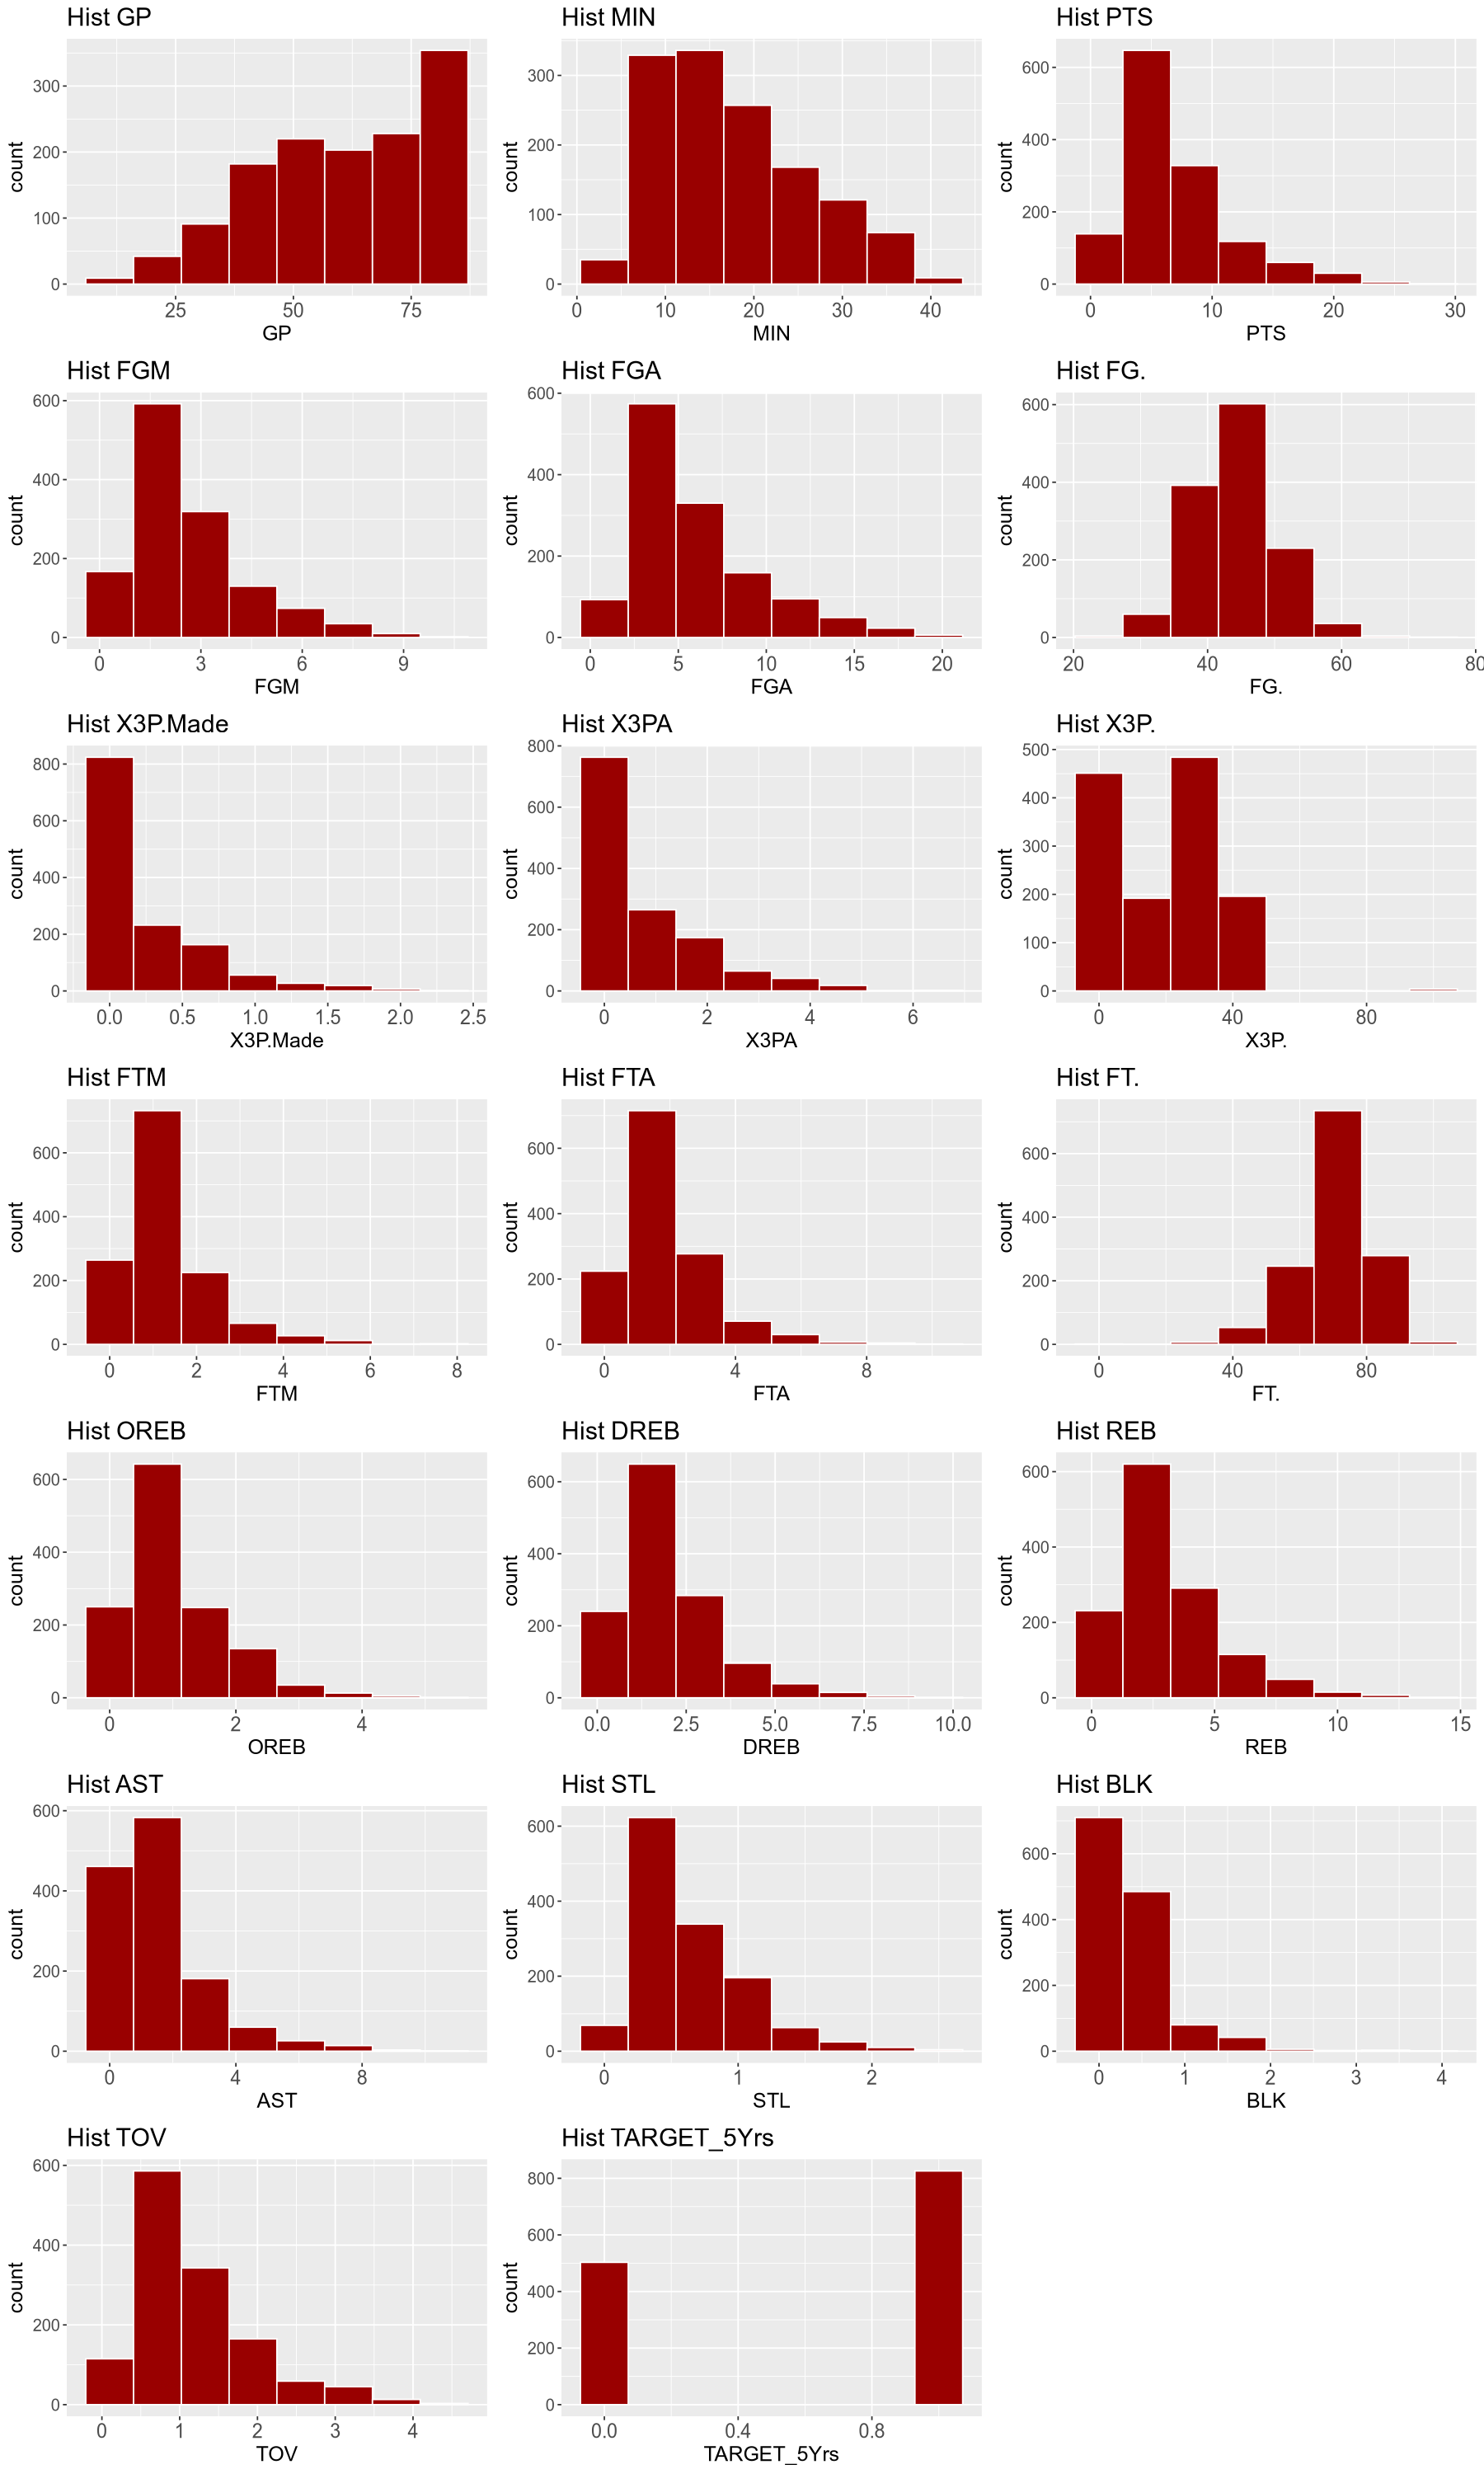

In [9]:
graficos_hist = list()
var_data = colnames(data_nba_num)

for (variable in var_data) {

  grafico = ggplot(data_nba_num) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#990000', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_hist[[length(graficos_hist) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 25  
)

# Mostrar los histogramas en un grid
grid.arrange(grobs = graficos_hist, ncol = 3, widths = rep(2, 3))

In [10]:
# Balance de las clases de la variable target
cat("Instancias de jugadores con una carrera mayor o igual a 5 años:", sum(data_nba_num$TARGET_5Yrs), "\n")
cat("Proporción de jugadores de carrera mayor o igual a 5 años sobre el total:",mean(data_nba_num$TARGET_5Yrs == 1) * 100, "\n")

Instancias de jugadores con una carrera mayor o igual a 5 años: 826 
Proporción de jugadores de carrera mayor o igual a 5 años sobre el total: 62.15199 


In [11]:
#Generamos datasets filtrando por la clase
data_nba_num_1 = data_nba_num[data_nba_num$TARGET_5Yrs == 1,]
data_nba_num_0 = data_nba_num[data_nba_num$TARGET_5Yrs == 0,]

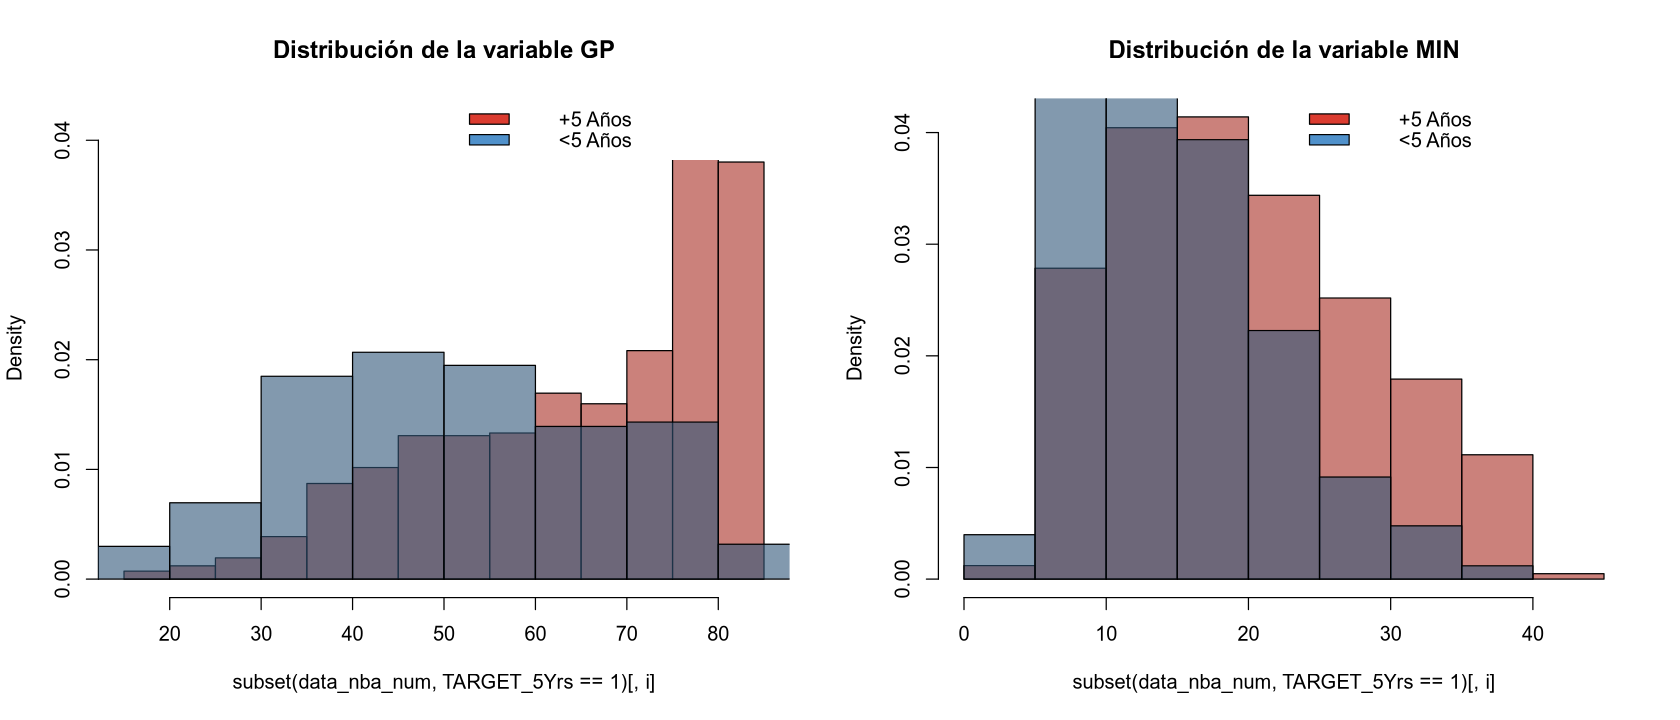

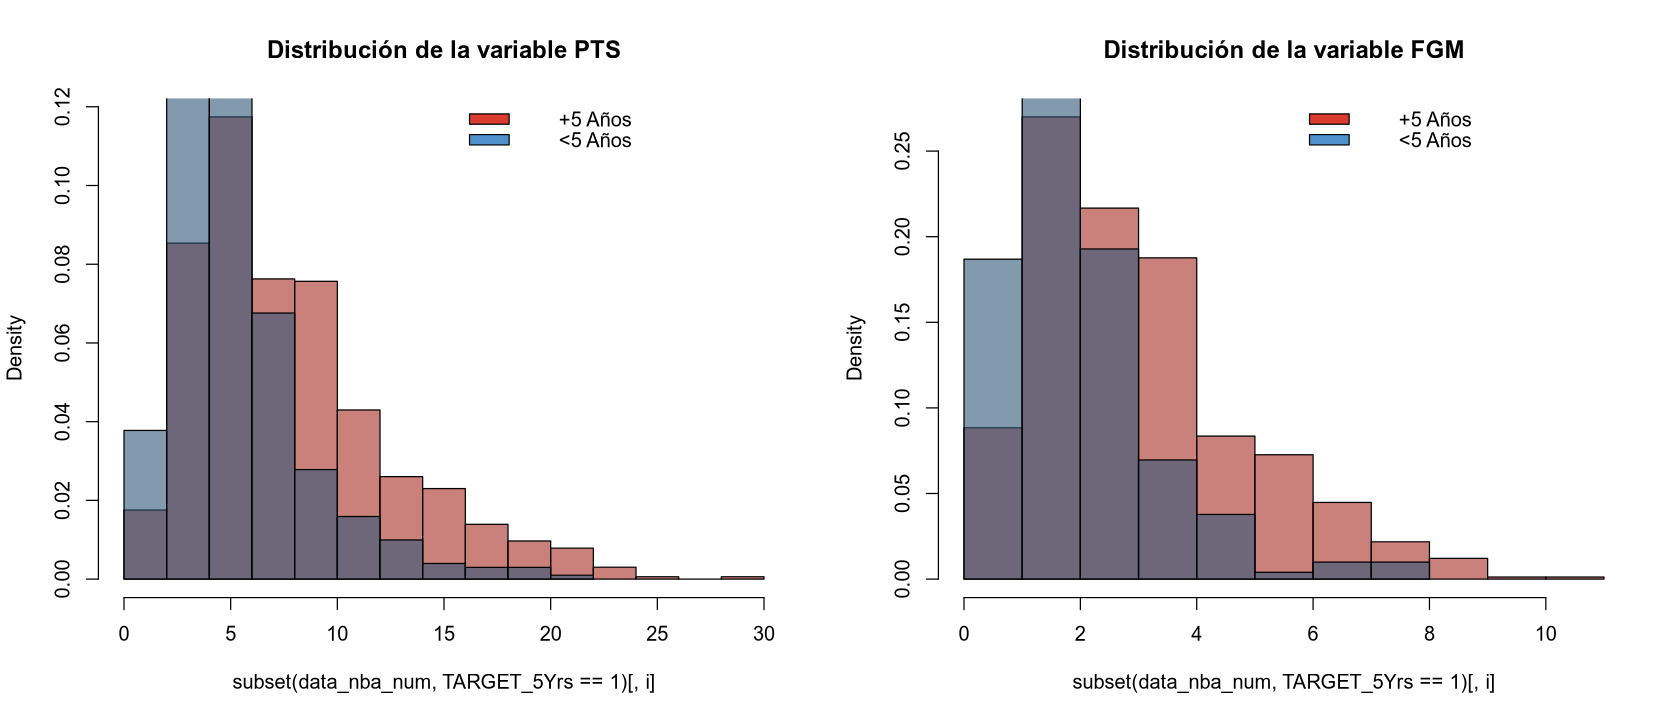

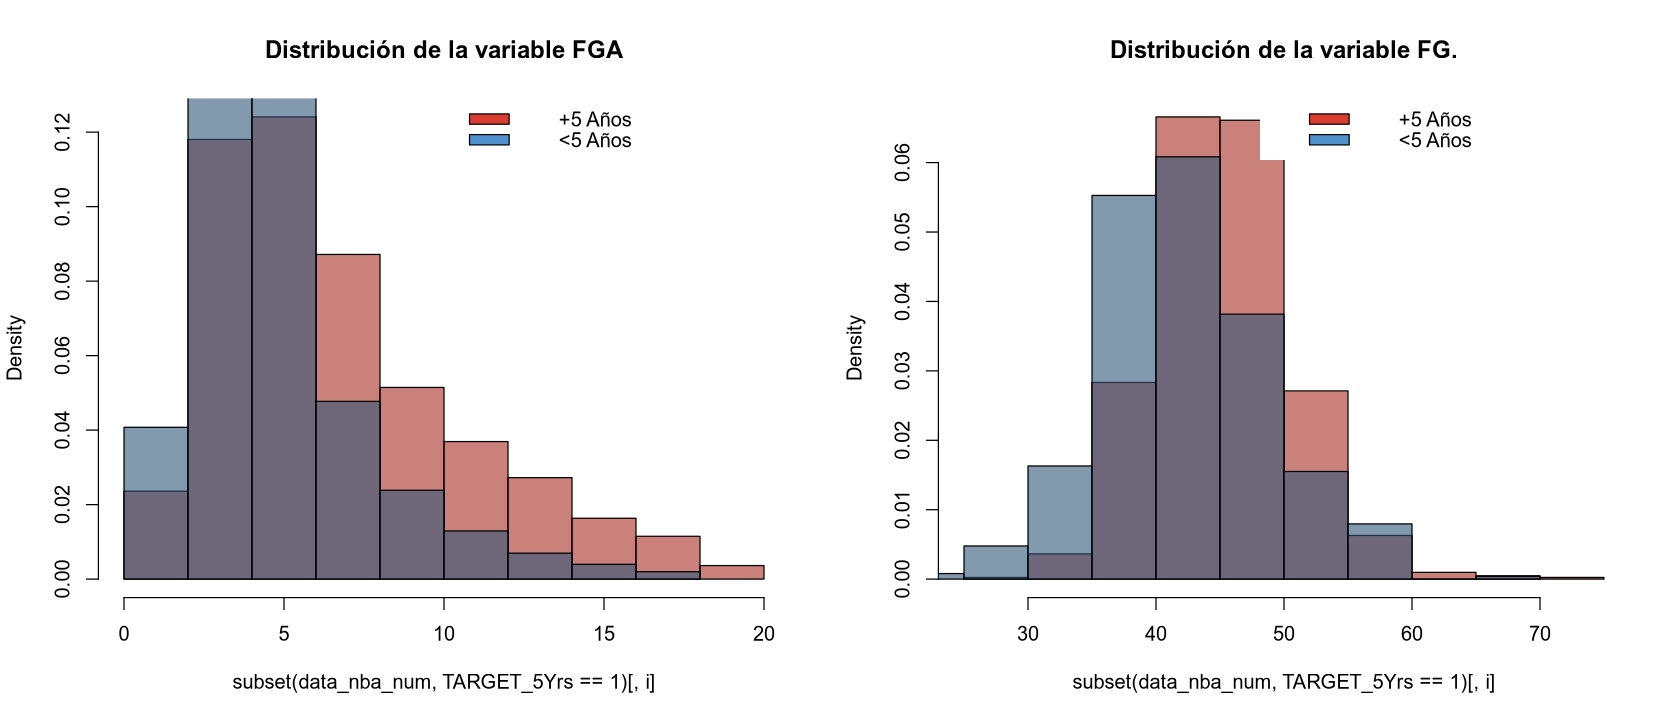

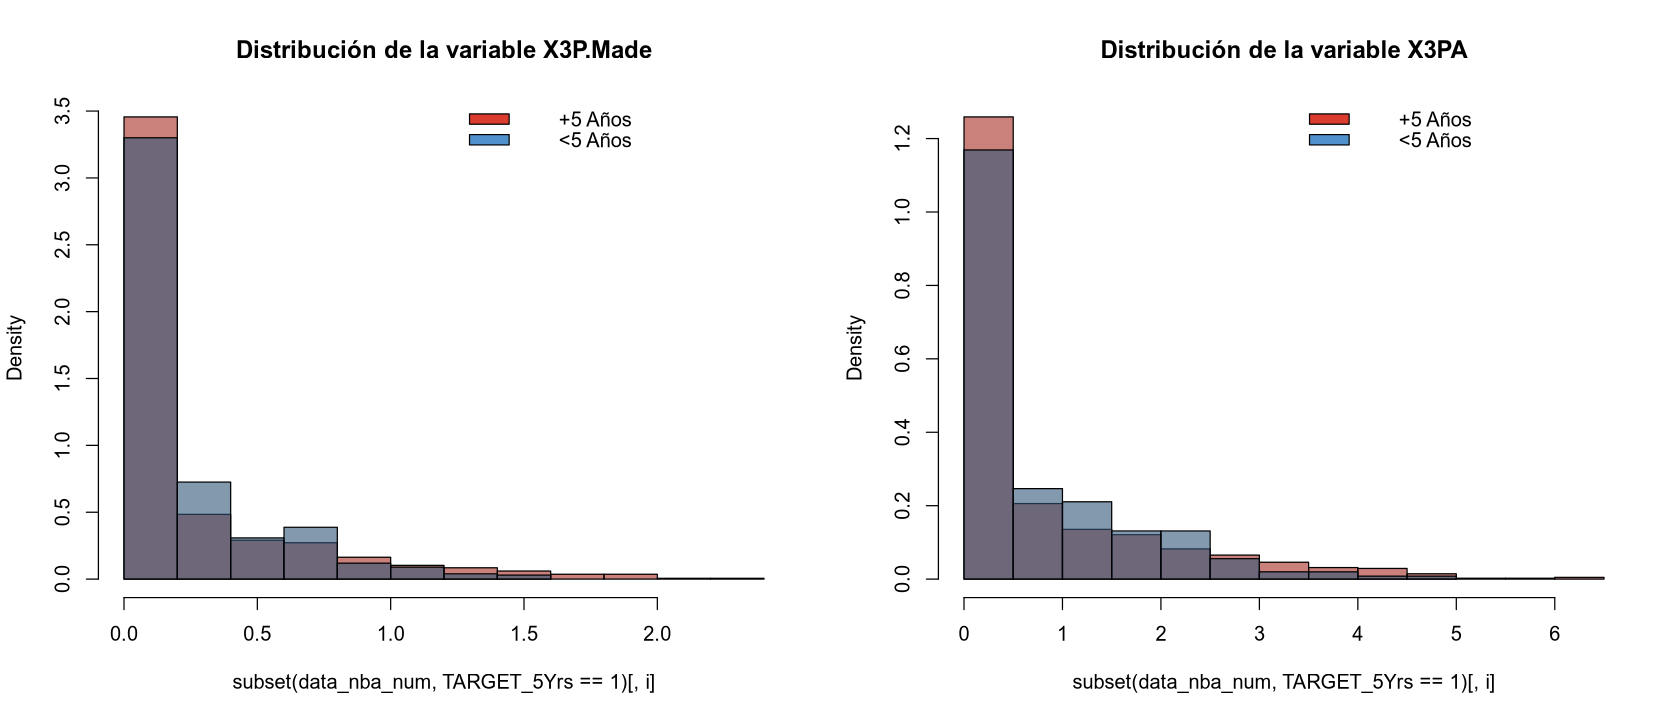

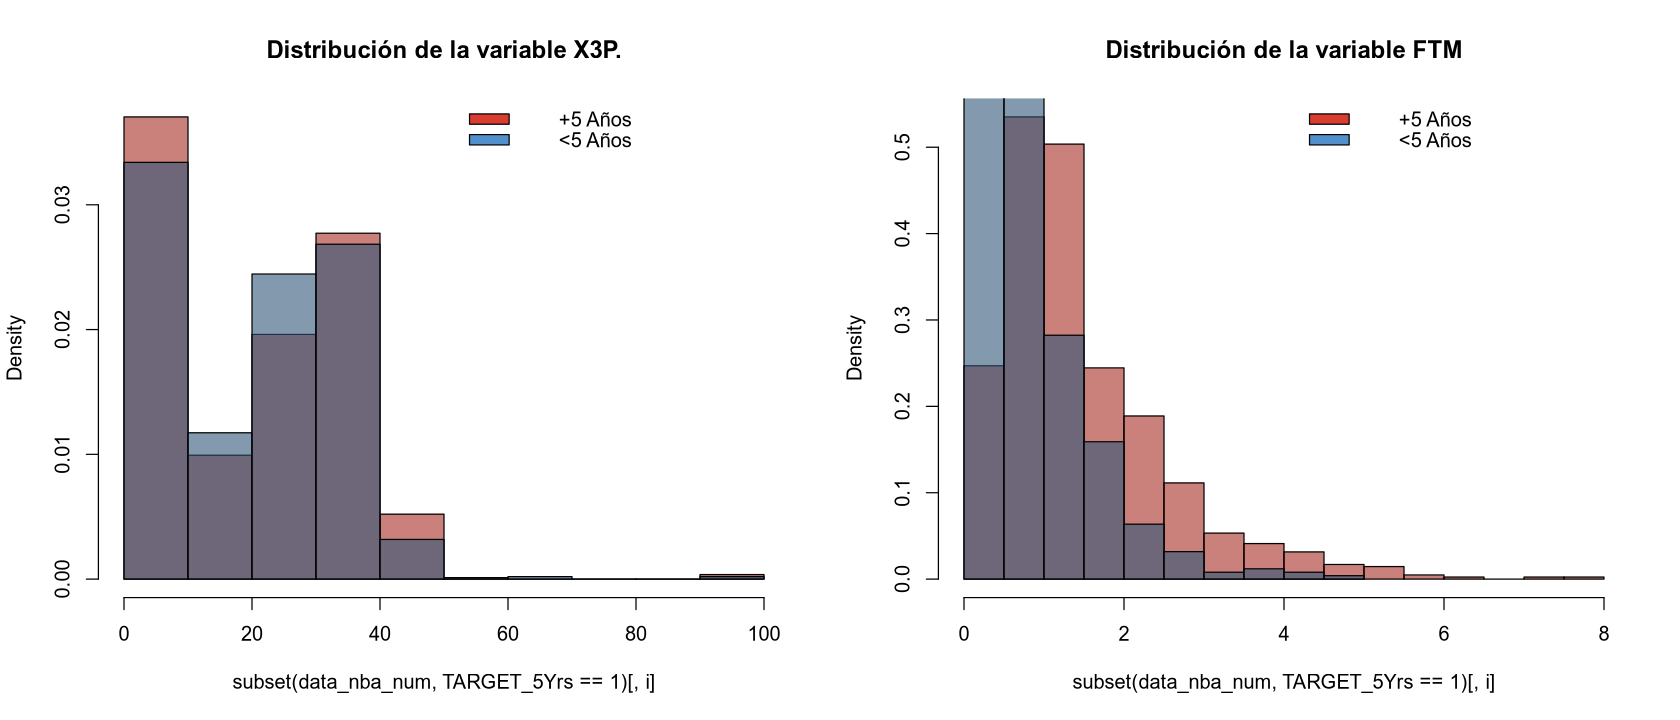

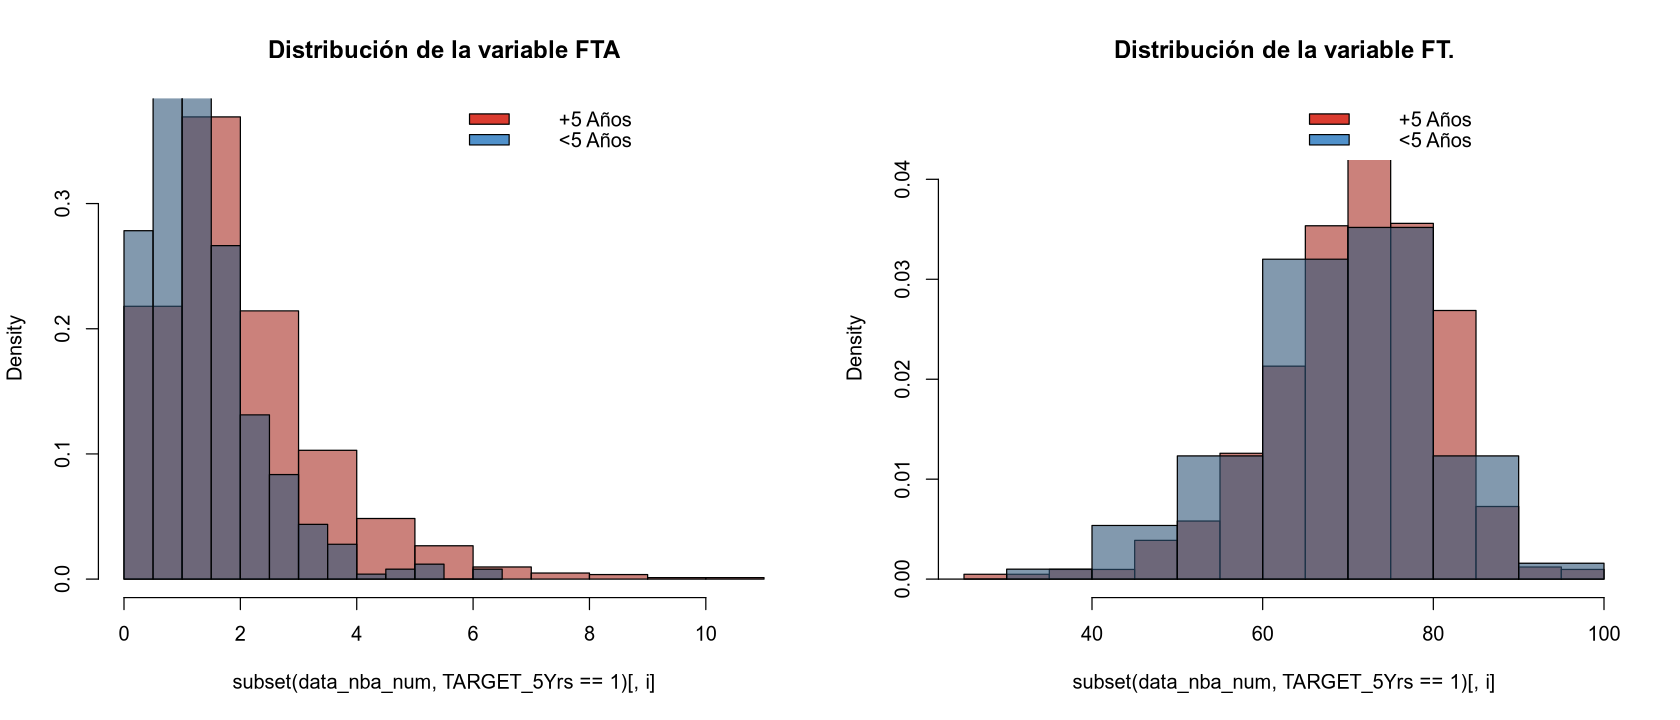

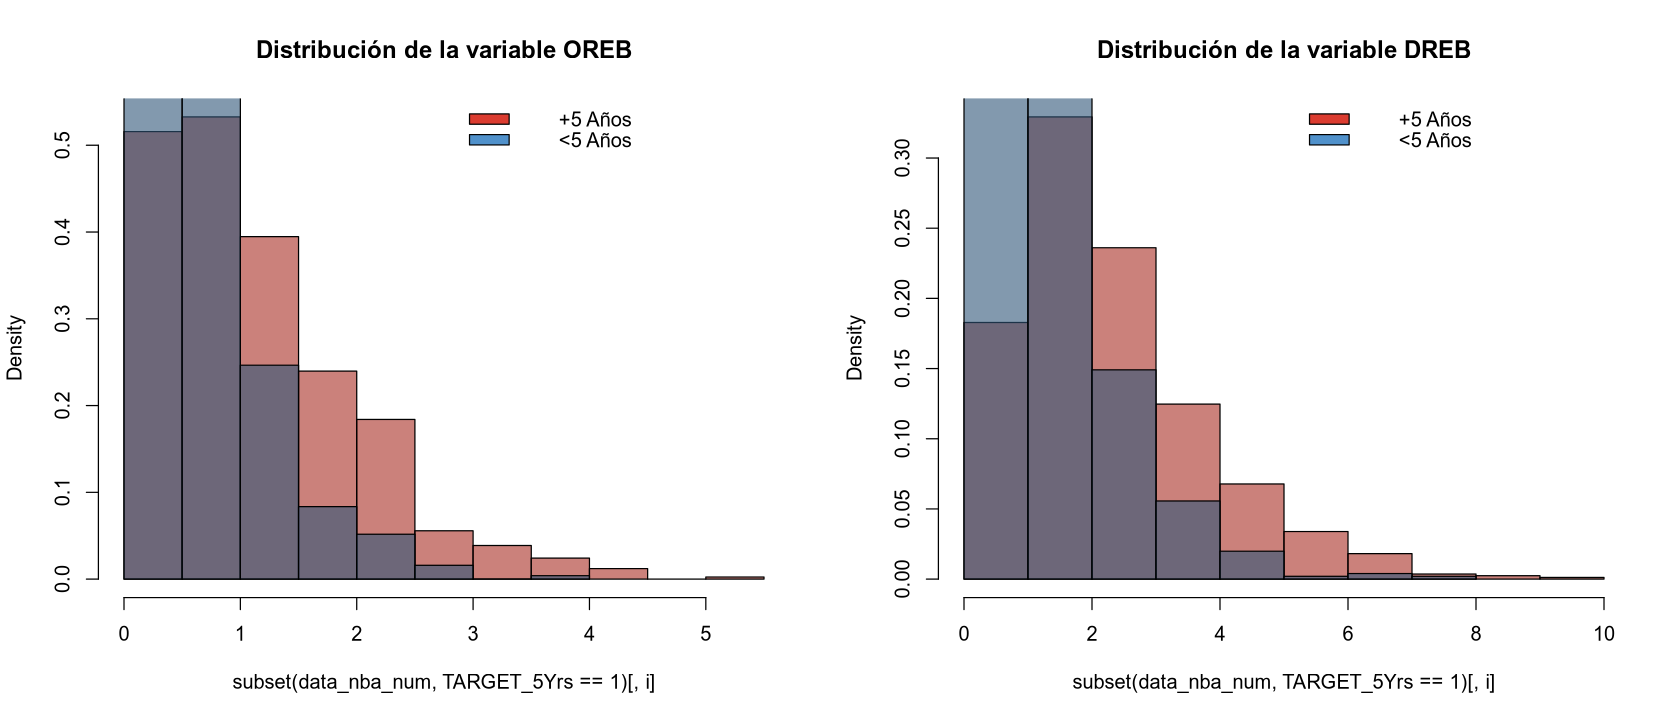

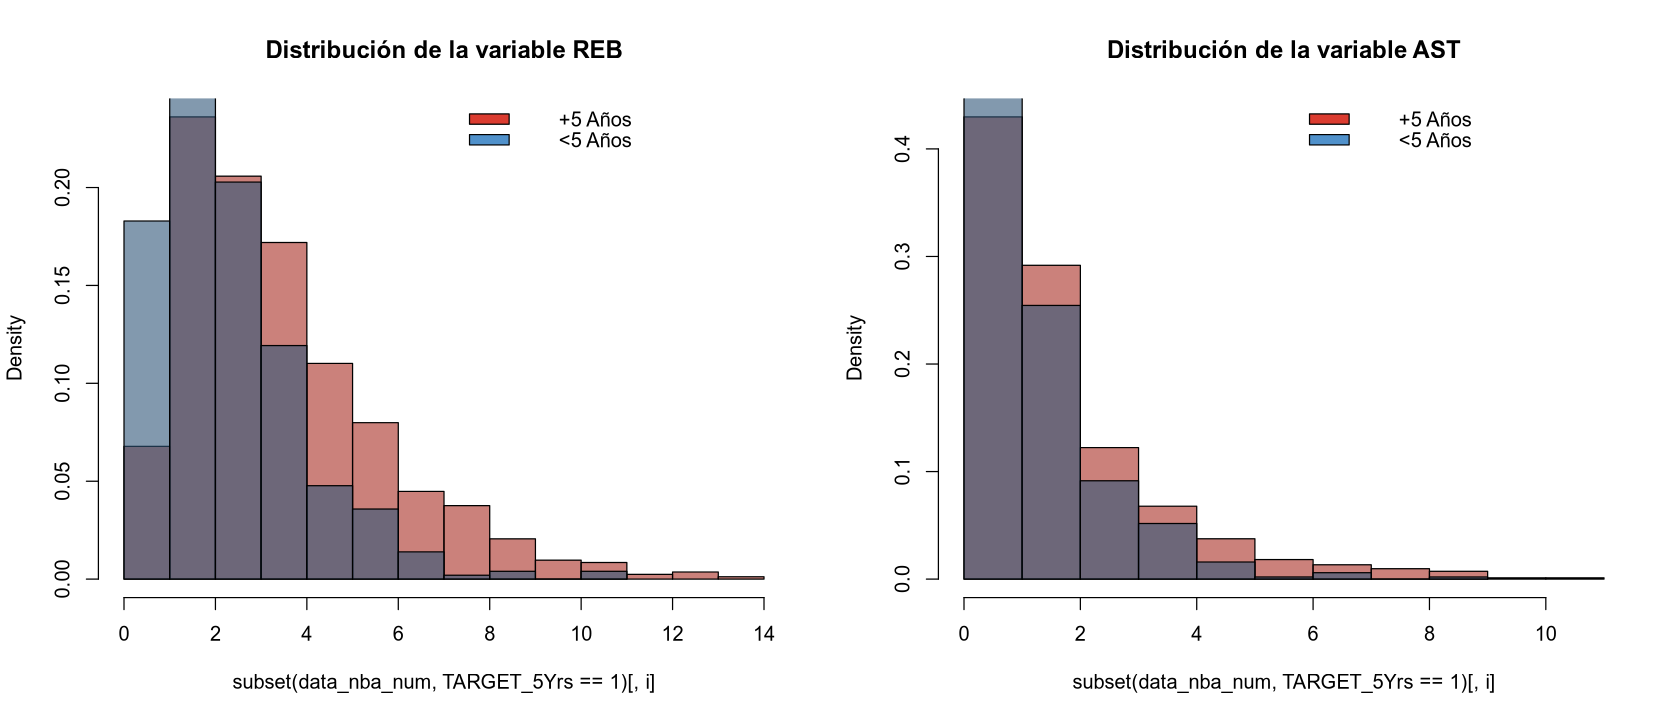

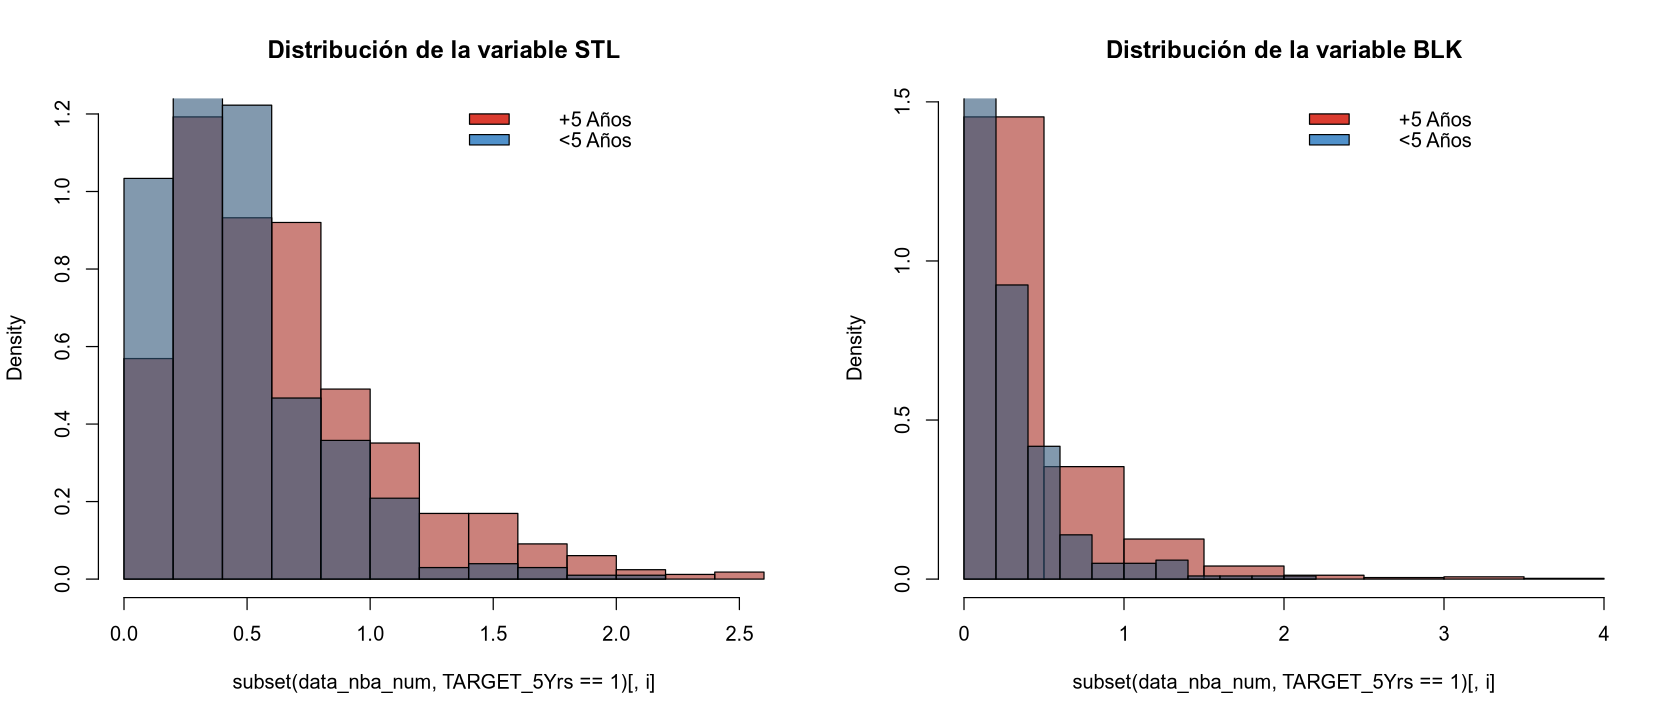

In [12]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data_nba_num)))-2)) {

  hist(subset(data_nba_num, TARGET_5Yrs == 1)[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data_nba_num)[i]),
       freq = FALSE)
  hist(subset(data_nba_num, TARGET_5Yrs == 0)[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
  #abline(v = mean(subset(data_nba_num, TARGET_5Yrs == 1)[, i]), col = '#990000', lwd = 4)
  #abline(v = mean(subset(data_nba_num, TARGET_5Yrs == 0)[, i]), col = '#0b5394', lwd = 4)
  legend(x = "topright", legend = c('+5 Años', '<5 Años'), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}
}

## <font color='#3d59c6'>  3. SELECCIÓN DE VARIABLES </font>

Se realizará un análisis de Correlaciones donde se observarán sobre todo las variables que tienen relación con la variable target, es decir, la que pretende predecir el modelo. Seguidamente se hará un Análisis de Componentes Principales con la intención de reducir la dimensionalidad de las variables en nuevas variables que sean independientes entre ellas (pues no interesa que haya colinealidad) y ver las variables que sean realmente importantes para explicar la variable target. Después se aplicarán diversos algoritmos que permitirán cuantificar la información mutua y así ver la relevancia de las variables y finalmente, habiendo elegido las variables más adecuadas mediante todos los procedimientos mencionados, se podrá realizar un modelo de regresión logística. El objetivo de este análisis es maximizar la clasificación de instancias de aquellos jugadores cuya trayectoria es más larga (de 5 o más años) respecto a la variable target que viene predefinida en el dataset

### <font color='#3d59c6'>  3.2 REALIZACIÓN IGA </font>

Con tal de ver la información mutua entre el target y las covariables se aplican los tres algoritmos detallados a continuación:

- "infogain": ${H(Class)} + H(Attribute) − H(Class, Attribute)$

- "gainratio" : $H(Class) + H(Attribute) − H(Class, Attribute) / H(Attribute) $

- "symuncert" : $2 * (H(Class) + H(Attribute) − H(Class, Attribute)) / (H(Attribute) + H(Class)) $

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”


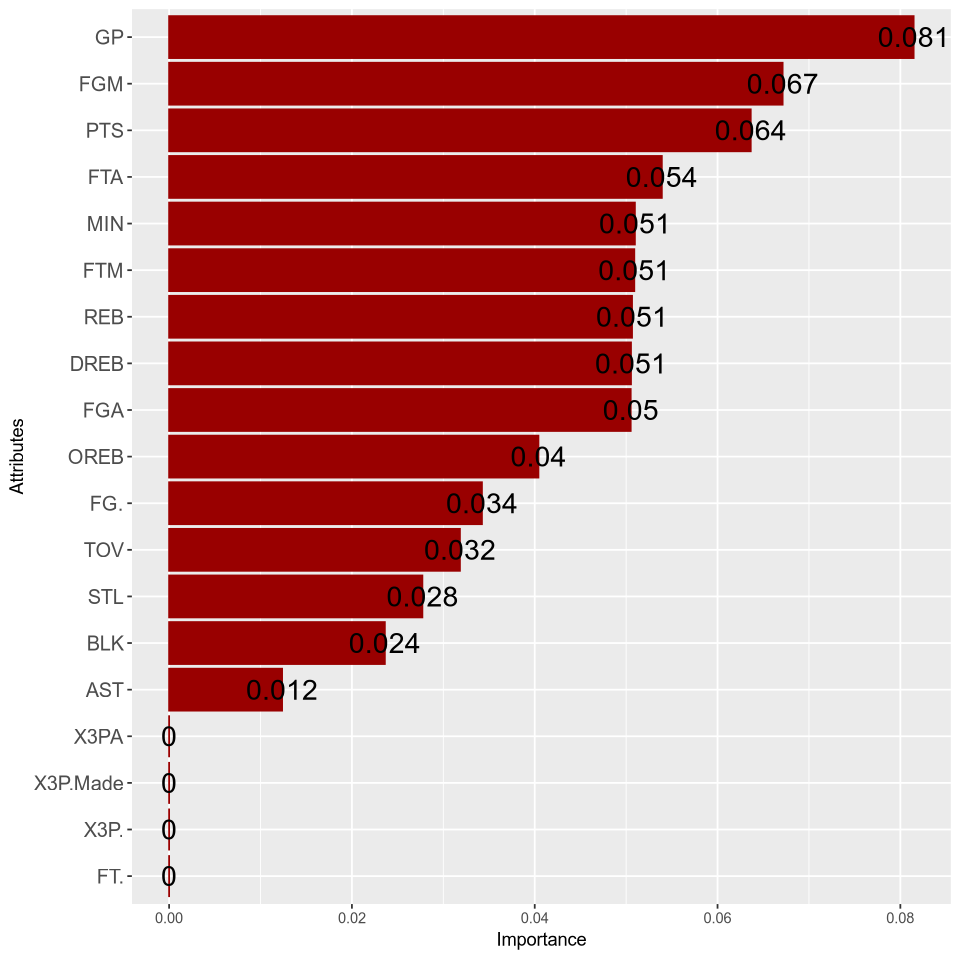

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = TARGET_5Yrs ~ .
                     , data = data_nba_num
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_text()`).”


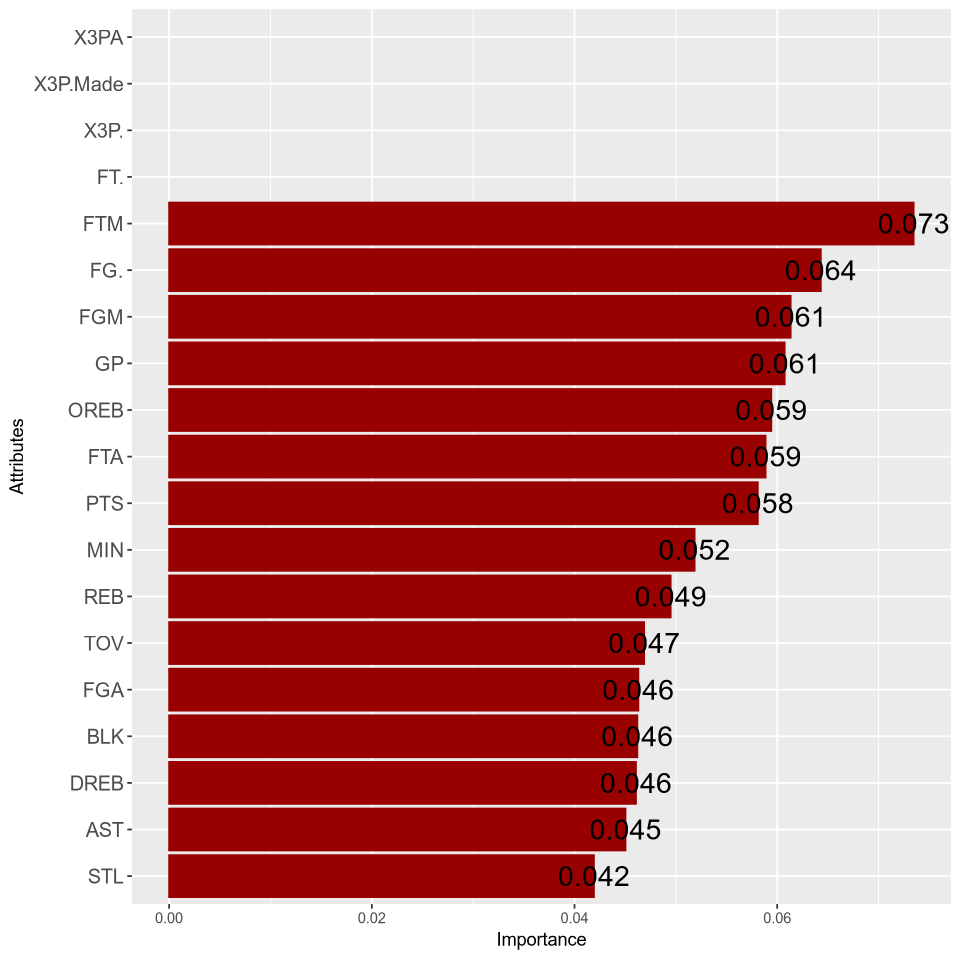

In [14]:
gr = information_gain(formula = TARGET_5Yrs ~ .
                     , data = data_nba_num
                     , type = 'gainratio')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”


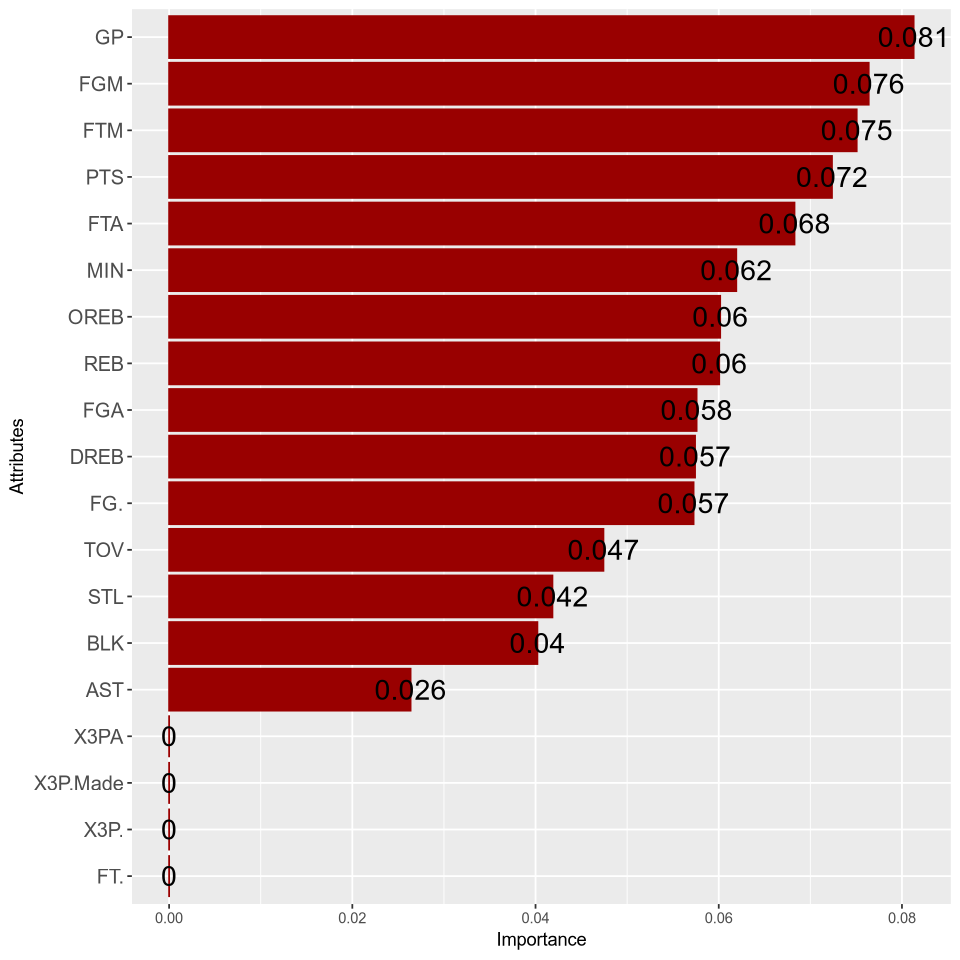

In [15]:
gr = information_gain(formula = TARGET_5Yrs ~ .
                     , data = data_nba_num
                     , type = 'symuncert')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

### <font color='#3d59c6'>  3.2 ANÁLISIS CORRELACIONES </font>

In [16]:
round(cor(data_nba_num),2)

,GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,FTM,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.00,0.59,0.54,0.54,0.52,0.30,0.11,0.10,0.04,0.48,0.48,0.20,0.40,0.47,0.46,0.37,0.45,0.28,0.52,0.40
MIN,0.59,1.00,0.91,0.90,0.91,0.21,0.39,0.40,0.17,0.79,0.78,0.24,0.57,0.75,0.71,0.63,0.76,0.40,0.83,0.32
PTS,0.54,0.91,1.00,0.99,0.98,0.26,0.35,0.36,0.15,0.90,0.88,0.25,0.58,0.70,0.68,0.55,0.67,0.39,0.85,0.31
FGM,0.54,0.90,0.99,1.00,0.98,0.30,0.29,0.30,0.12,0.85,0.84,0.22,0.60,0.71,0.69,0.53,0.66,0.40,0.83,0.32
FGA,0.52,0.91,0.98,0.98,1.00,0.14,0.39,0.41,0.20,0.83,0.81,0.26,0.51,0.64,0.62,0.59,0.69,0.33,0.85,0.29
FG.,0.30,0.21,0.26,0.30,0.14,1.00,-0.29,-0.35,-0.33,0.25,0.31,-0.15,0.51,0.41,0.47,-0.10,0.06,0.39,0.13,0.24
X3P.Made,0.11,0.39,0.35,0.29,0.39,-0.29,1.00,0.98,0.59,0.16,0.09,0.31,-0.22,0.02,-0.07,0.37,0.31,-0.16,0.26,0.04
X3PA,0.10,0.40,0.36,0.30,0.41,-0.35,0.98,1.00,0.58,0.17,0.11,0.32,-0.23,0.01,-0.08,0.41,0.34,-0.17,0.28,0.02
X3P.,0.04,0.17,0.15,0.12,0.20,-0.33,0.59,0.58,1.00,0.03,-0.03,0.33,-0.29,-0.12,-0.19,0.26,0.19,-0.24,0.11,0.00
FTM,0.48,0.79,0.90,0.85,0.83,0.25,0.16,0.17,0.03,1.00,0.98,0.25,0.59,0.66,0.66,0.47,0.60,0.41,0.80,0.30


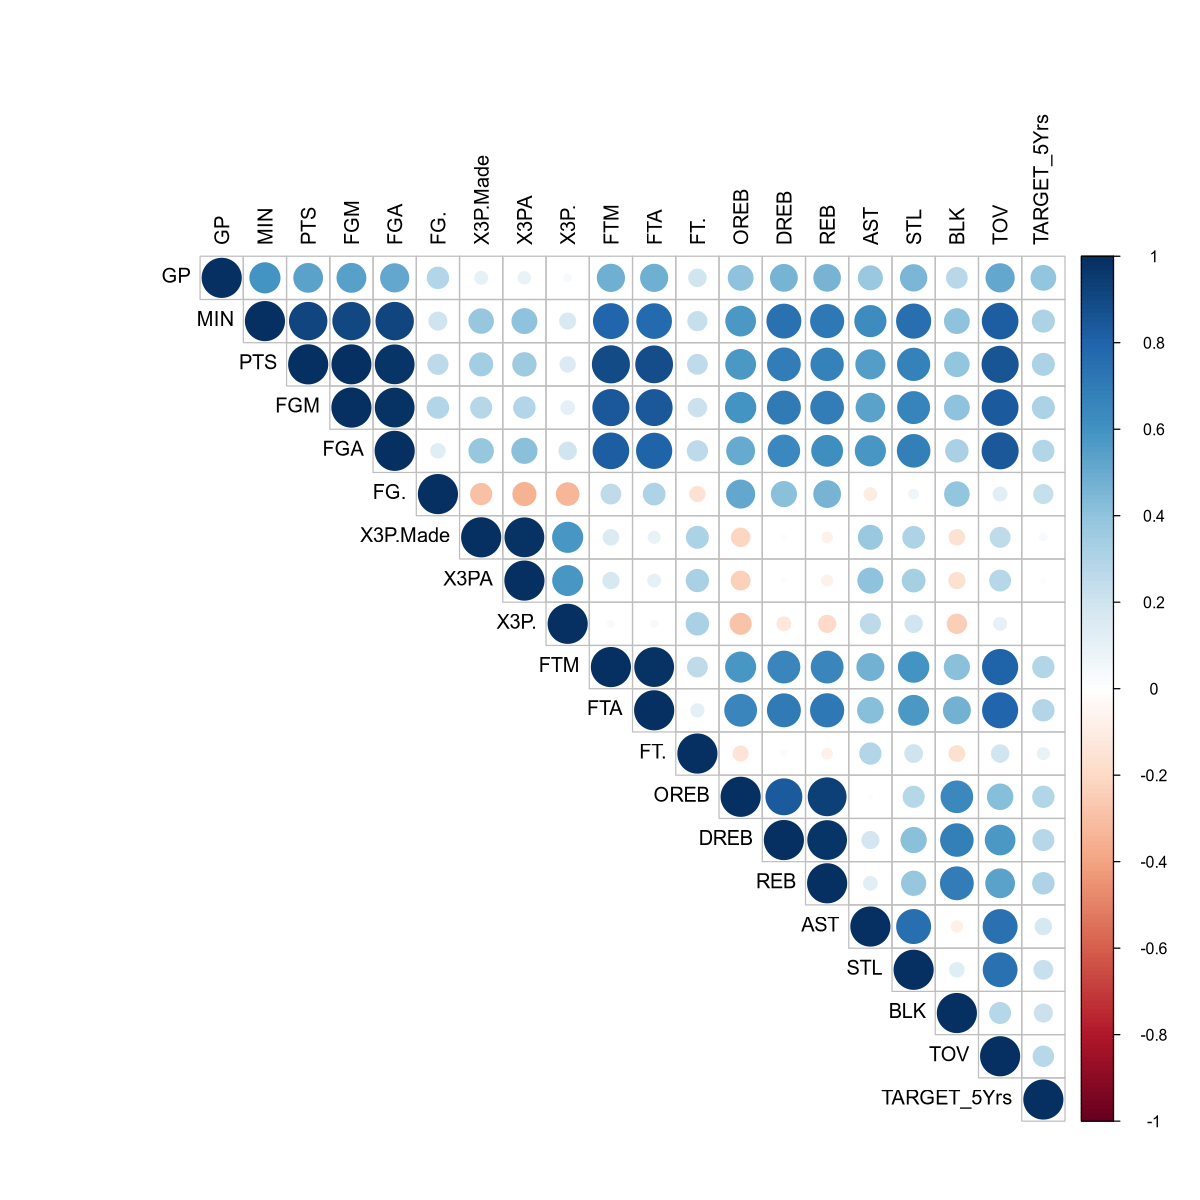

In [17]:
options(repr.plot.width = 10,  
  repr.plot.height = 10 )
corrplot::corrplot(cor(data_nba_num)
                   , type = "upper"
                   , number.cex = .6
                   , tl.col = "black"
                   , tl.srt = 90)

### <font color='#3d59c6'>  3.3 ANÁLISIS PCA </font>

In [18]:
data_nba_num_nt = data_nba_num %>%
  select(-TARGET_5Yrs)

In [19]:
PCA = princomp(data_nba_num_nt, scores = T)
summary(PCA)

Importance of components:
                           Comp.1     Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     19.2025050 16.5676994 9.3667470 7.7050772 5.26922285
Proportion of Variance  0.4457792  0.3318398 0.1060673 0.0717725 0.03356582
Cumulative Proportion   0.4457792  0.7776190 0.8836864 0.9554589 0.98902469
                            Comp.6      Comp.7      Comp.8       Comp.9
Standard deviation     2.011196397 1.639650627 0.975523515 0.7454020494
Proportion of Variance 0.004890047 0.003250175 0.001150481 0.0006717153
Cumulative Proportion  0.993914733 0.997164908 0.998315389 0.9989871042
                            Comp.10      Comp.11      Comp.12      Comp.13
Standard deviation     0.6807755037 0.3402940683 2.790508e-01 2.598324e-01
Proportion of Variance 0.0005602888 0.0001399951 9.413922e-05 8.161886e-05
Cumulative Proportion  0.9995473929 0.9996873880 9.997815e-01 9.998631e-01
                            Comp.14      Comp.15      Comp.16      Comp.17
Standar

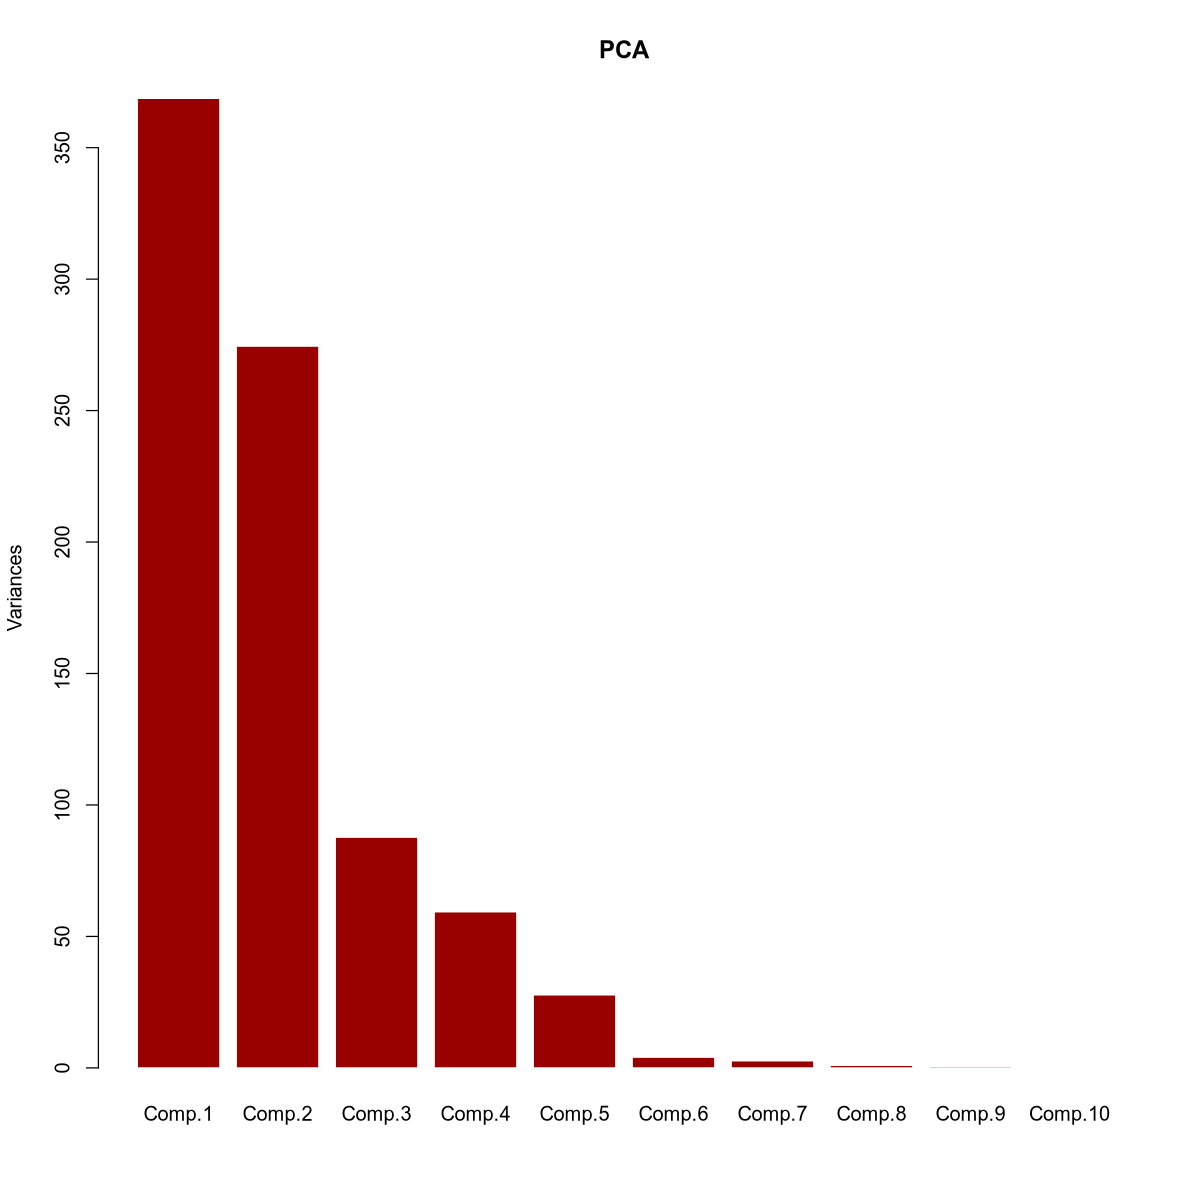

In [20]:
plot(PCA,type="bar",col="#990000", border = FALSE)

In [21]:
print(round(PCA$loadings[, 1:6],3))

         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
GP        0.854  0.304  0.150  0.388  0.066  0.021
MIN       0.319  0.021 -0.024 -0.705  0.163 -0.550
PTS       0.157  0.010 -0.031 -0.378  0.014  0.584
FGM       0.060  0.008 -0.008 -0.146 -0.002  0.229
FGA       0.127 -0.004 -0.025 -0.307  0.091  0.471
FG.       0.067  0.177  0.063 -0.144 -0.958 -0.033
X3P.Made  0.006 -0.013  0.000 -0.011  0.013 -0.012
X3PA      0.017 -0.035 -0.003 -0.033  0.050 -0.029
X3P.      0.257 -0.901  0.315  0.042 -0.139 -0.001
FTM       0.031  0.007 -0.015 -0.075  0.004  0.136
FTA       0.039  0.016 -0.003 -0.104  0.003  0.179
FT.       0.211 -0.242 -0.933  0.105 -0.111 -0.024
OREB      0.015  0.021  0.009 -0.049 -0.024 -0.011
DREB      0.036  0.025  0.011 -0.100 -0.019 -0.098
REB       0.051  0.047  0.020 -0.149 -0.044 -0.107
AST       0.039 -0.014 -0.015 -0.063  0.070 -0.056
STL       0.012 -0.001 -0.001 -0.024  0.013 -0.021
BLK       0.005  0.009  0.005 -0.019 -0.010 -0.014
TOV       0.024  0.003 -0.003 -

### <font color='#3d59c6'>  3.3 ANÁLISIS ANOVA </font>

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

In [22]:
resultados_anova = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = names(data_nba_num_nt)

for (variable in variables) {
  formula = as.formula(paste(variable, '~ TARGET_5Yrs'))
  anova_result = aov(formula, data = data_nba_num)
  
  # Extraer F value y p-value
  f_value = summary(anova_result)[[1]][['F value']][1]
  p_value = summary(anova_result)[[1]][['Pr(>F)']][1]
 resultados_anova = rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

   Variable      F_Value      P_Value
1        GP 249.44239837 1.272005e-51
2       MIN 147.24031764 3.293044e-32
3       PTS 145.79708367 6.334723e-32
4       FGM 147.61599131 2.777711e-32
5       FGA 122.47646448 2.721310e-27
6       FG.  77.97817249 3.228273e-18
7  X3P.Made   1.62987265 2.019440e-01
8      X3PA   0.34623729 5.563510e-01
9      X3P.   0.01543702 9.011395e-01
10      FTM 127.00364277 3.381421e-28
11      FTA 127.44872983 2.755648e-28
12      FT.  12.24513922 4.819086e-04
13     OREB 126.14936837 5.009158e-28
14     DREB 117.91816400 2.237751e-26
15      REB 131.71473402 3.889338e-29
16      AST  41.32676857 1.792201e-10
17      STL  73.39377997 2.903124e-17
18      BLK  62.29365085 6.150351e-15
19      TOV 104.98582506 9.189827e-24


## <font color='#3d59c6'>  4. MODELO REGRESIÓN LOGÍSTICA </font>

Después de haber realizado un análisis de **correlaciones** para ver las posibles relaciones lineales entre variables se ha descartado una relación lineal entre la variable target y las covariables. No obstante, se han visto algunas correlaciones altas -inclusive alguna prácticamente perfecta- entre las covariables. Las variables más destacadas del estudio de correlación han sido: **GP, FGM y MIN**. 

En el **análisis de componentes principales** se han tenido en cuenta los primeros cuatro PC explicando el 95.53% de la varianza. Aparte de la variable GP y MIN se ha destacado la importancia de las variables **PTS, FGA, FT., FG.** y X3P.. No obstante, mediante los diversos algoritmos aplicados para la información mutua de las variables con la variable target, se ha descartado la variable X3P. ya que no contenía información mutua en ninguno de los casos. Mediante el primer algoritmo se ha visto -como ya se había visto en los análisis anteriores- la importancia de GP, PTS y FGM y se ha visto la relevancia de las variables **REB y FTA**. En el segundo algoritmo se observa la importancia de las variables FTM, FG., GP, FGM y PTS y finalmente en el último algoritmo los resultados han sido muy parecidos al primero. Así pues, destacaríamos la importancia de estas variables para realizar el modelo. Teniendo en cuenta los tres algoritmos y los análisis de correlaciones y de componentes principales previos se eligen como variables para configurar un primer modelo: **GP, PTS, FGM, REB, FTA, FTM y FG.**. 

Así pues, a continuación, se realiza un primer modelo con las variables elegidas.

In [23]:
data_nba_num_subset = subset(data_nba_num, select = c(TARGET_5Yrs, GP, PTS, FGM, REB, FTA, FTM, FG.))

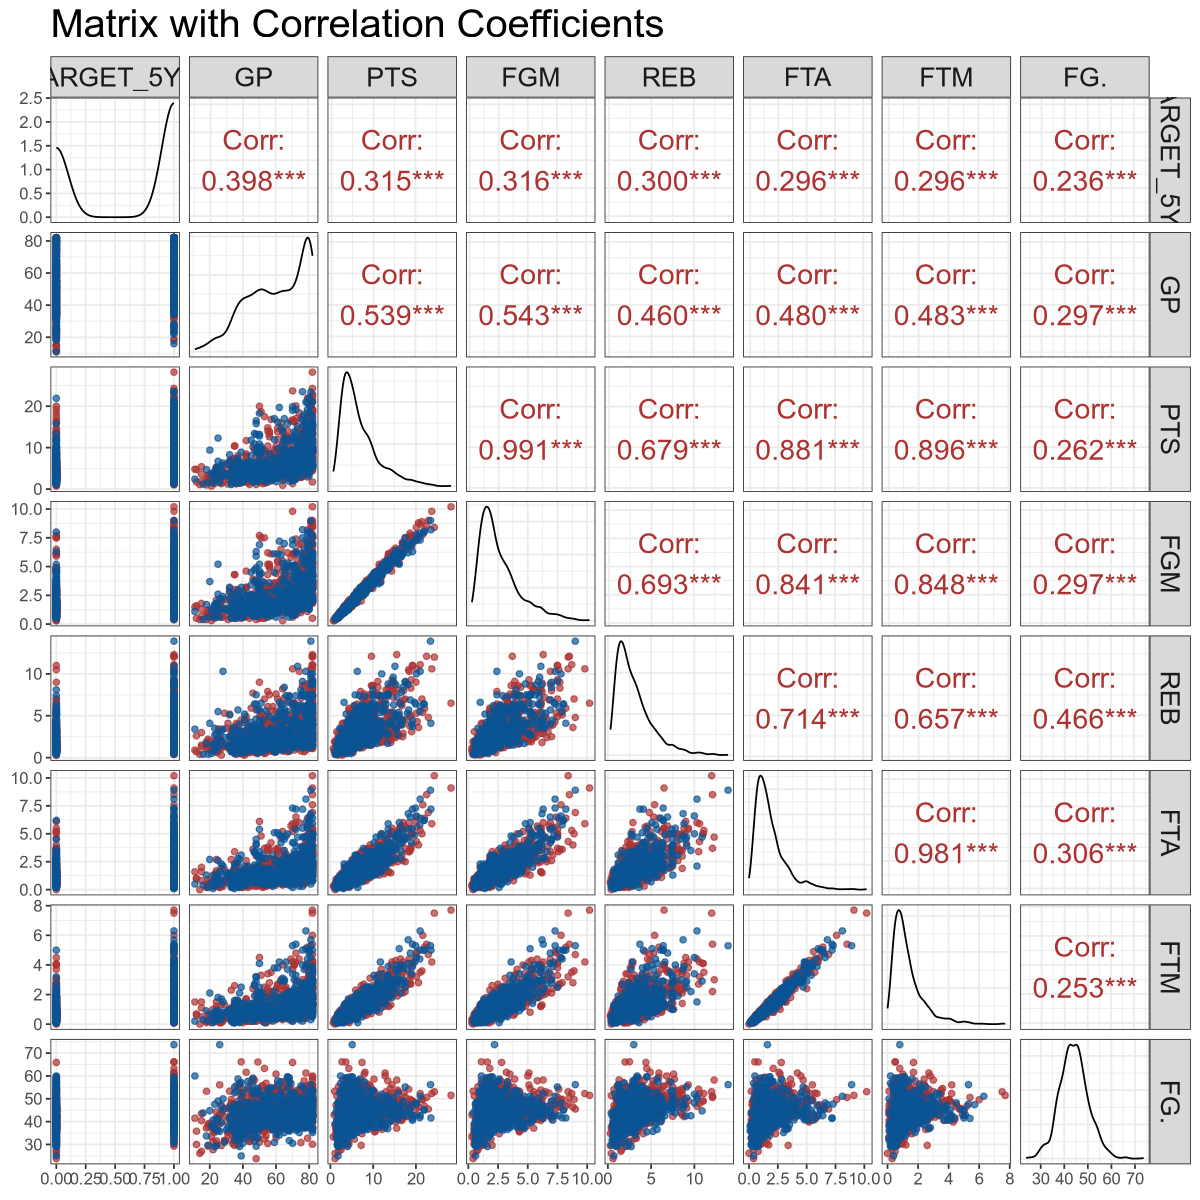

In [24]:
options(repr.plot.width = 10,  repr.plot.height = 10  )

nba_1_s = sum(data_nba_num_subset$TARGET_5Yrs == 1)
nba_0_s = sum(data_nba_num_subset$TARGET_5Yrs == 0)
colores = c(rep('#ad3232',nba_1_s), rep('#0b5394',nba_0_s))

ggpairs(
  data_nba_num_subset,
  title = "Matrix with Correlation Coefficients",
  lower = list(continuous = wrap("points", alpha = 0.7, color = colores)),
  upper = list(continuous = wrap("cor", size = 6, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 20), 
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10)
)

Correlacion PTS-FGM (me quedo FGM por aportar + info) y FTA-FTM (me quedo FTA por aportar + info)

### <font color='#3d59c6'>  4.1 FASE TRAIN </font>

In [25]:
set.seed(5)
inTrain = createDataPartition(y = data_nba_num$TARGET_5Yrs
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data_nba_num.train = data_nba_num[inTrain,]
data_nba_num.test = data_nba_num[-inTrain,]

ytrain = data_nba_num$TARGET_5Yrs[inTrain]
ytest = data_nba_num$TARGET_5Yrs[-inTrain]

In [26]:
### Generamos un primer modelo unicamente con la variable GP
mrl0 = glm(formula = TARGET_5Yrs ~ GP
          , data = data_nba_num.train
          , family = "binomial")
summary(mrl0)


Call:
glm(formula = TARGET_5Yrs ~ GP, family = "binomial", data = data_nba_num.train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.538493   0.250738  -10.12   <2e-16 ***
GP           0.051649   0.004187   12.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1413.8  on 1063  degrees of freedom
Residual deviance: 1233.5  on 1062  degrees of freedom
AIC: 1237.5

Number of Fisher Scoring iterations: 4


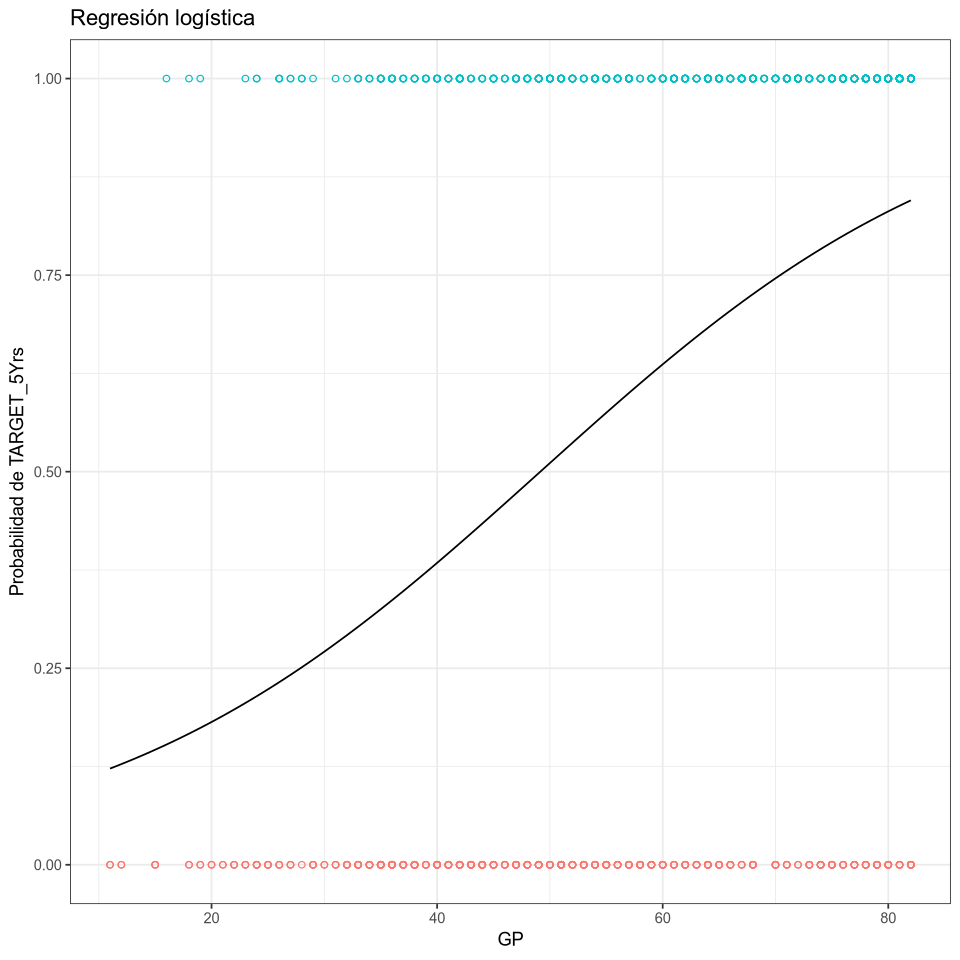

In [27]:
# Representación gráfica del modelo.
options(repr.plot.width = 8,  repr.plot.height = 8  )
ggplot(data = data_nba_num.train, aes(x = GP, y = TARGET_5Yrs)) +
  geom_point(aes(color = as.factor(TARGET_5Yrs)), shape = 1) + 
  stat_function(fun = function(x){predict(mrl0,
                                          newdata = data.frame(GP = x),
                                          type = "response")}) +
  theme_bw() +
  labs(title = "Regresión logística",
       y = "Probabilidad de TARGET_5Yrs") +
  theme(legend.position = "none")

In [28]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl1 = glm(formula = TARGET_5Yrs ~ GP + FGM + REB + FTA  + FG.
          , data = data_nba_num.train
          , family = "binomial")
summary(mrl1)


Call:
glm(formula = TARGET_5Yrs ~ GP + FGM + REB + FTA + FG., family = "binomial", 
    data = data_nba_num.train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.862532   0.569163  -6.786 1.15e-11 ***
GP           0.036460   0.004868   7.490 6.91e-14 ***
FGM          0.090418   0.090391   1.000  0.31716    
REB          0.117657   0.061227   1.922  0.05465 .  
FTA          0.122697   0.119038   1.031  0.30266    
FG.          0.033588   0.012937   2.596  0.00942 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1413.8  on 1063  degrees of freedom
Residual deviance: 1189.5  on 1058  degrees of freedom
AIC: 1201.5

Number of Fisher Scoring iterations: 4


Se puede ver como las variables PTS, FGM y FTA y FTM no resultan significativas (por su p-value superior a 0.05) y se decide realizar un segundo modelo excluyéndolas.

In [29]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl2 = glm(formula = TARGET_5Yrs ~ GP + REB + FG.
          , data = data_nba_num.train
          , family = binomial)
summary(mrl2)


Call:
glm(formula = TARGET_5Yrs ~ GP + REB + FG., family = binomial, 
    data = data_nba_num.train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.830411   0.570107  -6.719 1.83e-11 ***
GP           0.040530   0.004543   8.922  < 2e-16 ***
REB          0.204126   0.049826   4.097 4.19e-05 ***
FG.          0.031478   0.012934   2.434   0.0149 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1413.8  on 1063  degrees of freedom
Residual deviance: 1195.3  on 1060  degrees of freedom
AIC: 1203.3

Number of Fisher Scoring iterations: 4


In [30]:
### Generamos las predicciones de nuestro modelo
mrl2_prob = predict(mrl2, type = 'response')
head(mrl2_prob)

1         2         3         5         6         7 
0.3912327 0.2708698 0.7203616 0.5682660 0.6691088 0.6130116

In [31]:
### Vemos la predicción para cada instancia
mrl2_pred = ifelse(mrl2_prob > 0.5, 1, 0)
head(mrl2_pred)

1 2 3 5 6 7 
0 0 1 1 1 1

In [32]:
confusionMatrix(as.factor(mrl2_pred), as.factor(data_nba_num.train$TARGET_5Yrs))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 217 116
         1 188 543
                                          
               Accuracy : 0.7143          
                 95% CI : (0.6861, 0.7413)
    No Information Rate : 0.6194          
    P-Value [Acc > NIR] : 4.889e-11       
                                          
                  Kappa : 0.3725          
                                          
 Mcnemar's Test P-Value : 4.659e-05       
                                          
            Sensitivity : 0.5358          
            Specificity : 0.8240          
         Pos Pred Value : 0.6517          
         Neg Pred Value : 0.7428          
             Prevalence : 0.3806          
         Detection Rate : 0.2039          
   Detection Prevalence : 0.3130          
      Balanced Accuracy : 0.6799          
                                          
       'Positive' Class : 0               
                              

### <font color='#3d59c6'>  4.2 FASE TEST </font>

In [33]:
pred_mrl2= predict(mrl2,newdata = data_nba_num.test, type="response")
mrl2_pred = ifelse(pred_mrl2 > 0.5, 1, 0)
confusionMatrix(as.factor(mrl2_pred), as.factor(data_nba_num.test$TARGET_5Yrs))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  43  27
         1  55 140
                                          
               Accuracy : 0.6906          
                 95% CI : (0.6311, 0.7457)
    No Information Rate : 0.6302          
    P-Value [Acc > NIR] : 0.023252        
                                          
                  Kappa : 0.2945          
                                          
 Mcnemar's Test P-Value : 0.002867        
                                          
            Sensitivity : 0.4388          
            Specificity : 0.8383          
         Pos Pred Value : 0.6143          
         Neg Pred Value : 0.7179          
             Prevalence : 0.3698          
         Detection Rate : 0.1623          
   Detection Prevalence : 0.2642          
      Balanced Accuracy : 0.6385          
                                          
       'Positive' Class : 0               
                              

## <font color='#3d59c6'>  5. CONCLUSIÓN </font>

El dataset se componía de un total de 1340 registros (un 62,2% carrera mayor o igual a 5 años) y 21 variables. Para la realización de un modelo de regresión logística que permita predecir qué jugadores de la NBA van a tener una carrera deportiva de 5 o más años a partir de ciertas variables se han utilizado varias técnicas para la detección de las variables que más información pueden aportar al modelo:

- Análisis Correlaciones: GP; FGM; MIN;
- Realización IGA - Information Gain Algorithms: GP; FGM; PTS; FG; FTA; REB
- Análisis PCA: GP; MIN; PTS; FGA; FT; FG;
- Análisis ANOVA

Finalmente se construye el modelo con: **GP, REB y FG.**

En la fase de Test se obtiene:

- Accuracy del 69%
- Sensibilidad (verdaderos positivos):44% 
- Especificidad (verdaderos negativos):83%
